## Statistical Data Analysis on Boston Housing Dataset

 The Housing dataset which contains information about different houses in Boston.
 So, let's get started.

In [1]:
# First, we will import the required libraries.

import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

C:\Users\Bohe Rana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's load the dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

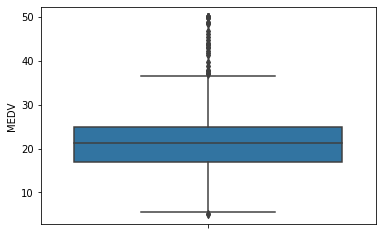

In [3]:
# Q1: For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y='MEDV', data=boston_df)

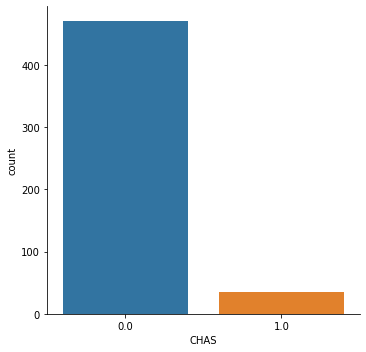

In [4]:
#Q2: #Provide a  histogram for the Charles river variable

sns.catplot(x='CHAS', kind='count', data=boston_df)

In [5]:
#Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

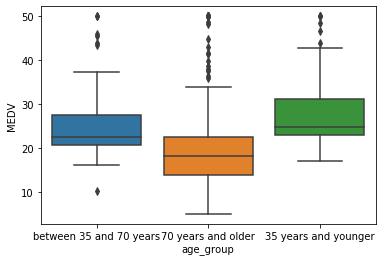

In [6]:
sns.boxplot(y='MEDV', x='age_group', data=boston_df)

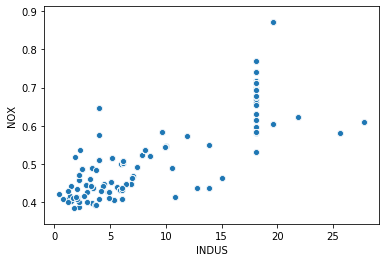

In [7]:
#Q4:Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
    
sns.scatterplot(y='NOX', x='INDUS', data=boston_df)

We can witness a positive correlation here, i.e. as the Nitric oxide concentrations increase, the proportion of non-retail business acres per town increase as well.

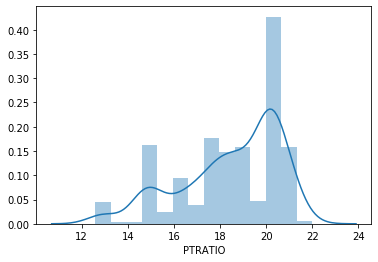

In [8]:
#Q5: Create a histogram for the pupil to teacher ratio variable

ax = sns.distplot(boston_df['PTRATIO'], kde = True)

Let's use the appropriate tests to answer the folowing questions:

In [9]:
#Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#𝐻0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river")
#𝐻1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, we can reject the null hypothesis and we can conclude that there is a difference in median value of houses bounded by the Charles river

In [10]:
#Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#𝐻0:µ1=µ2=µ3  (the three population means are equal)
#𝐻1: At least one of the means differ

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than 0.05, we can reject the null hypothesis and we can conclude that there is enough proof that there is a statistical difference 
#in median value of houses bounded by the Charles river

In [11]:
#Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#𝐻0:  Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
#𝐻1:  Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#since p-value is less than 0.05, we can reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS

(0.7636514469209152, 7.913361061237794e-98)

In [12]:
# Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#𝐻0:β1  = 0 (DIS has no impact on MEDV)
#𝐻1:β1 is not equal to 0 (DIS has an impact on MEDV)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

#since p-value is less than 0.05, we can reject the Null hypothesis and conclude that DIS has an impact on MEDV variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        00:46:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""